# Value Transformation


[The dataset](https://drive.google.com/file/d/1B07fvYosBNdIwlZxSmxDfeAf9KaygX89/view?usp=sharing) represents sales data for 1559 products across 10 stores in different cities. Also, attributes of each product and store are available. The aim is to build a predictive model and determine the sales of each product at a particular store.

![title](Data_House.png)

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

In this notebook, we are going to learn how to do value transformation on the housing dataset.

### Exploring Data

First, Let's load the data here and take a look at the data. 

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/regression_exercise.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Since we are going to apply different transformations to different data types, we start by extracting the numeric feature names:

In [3]:
num_feats = df.dtypes[df.dtypes != 'object'].index.tolist()

In [4]:
num_feats

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

Using displot, we can take a look at a distribution of all numerica features in the dataset

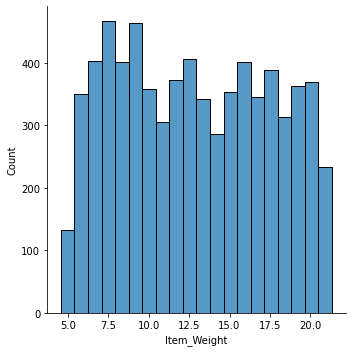

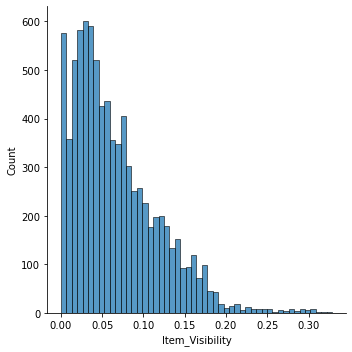

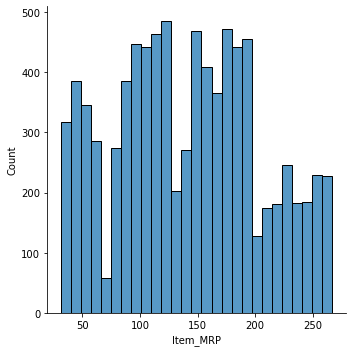

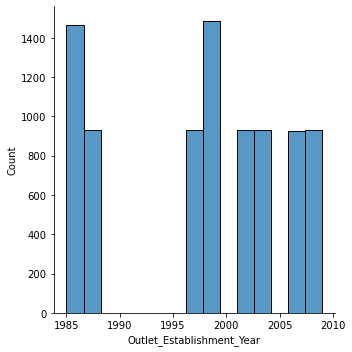

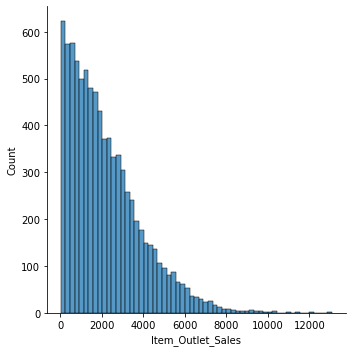

In [6]:
import seaborn as sns

for column in num_feats:
    sns.displot(df[column])

Now, we will transform the one of the features that are skewed. For example `Item_Visibility`:

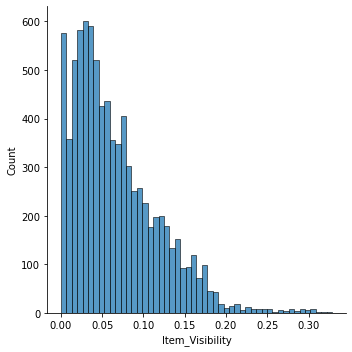

In [7]:
import seaborn as sns

sns.displot(df['Item_Visibility'])

We will apply _the logarithmic transformation_:


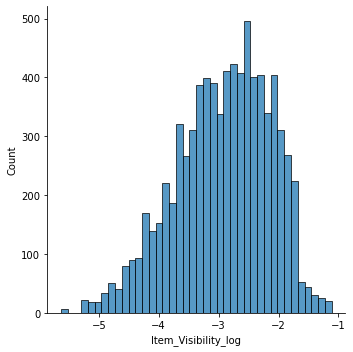

In [8]:
# log transformation
df["Item_Visibility_log"] = df["Item_Visibility"].apply(np.log)
sns.displot(df["Item_Visibility_log"])

In [9]:
df["Item_Visibility_log"]

0      -4.132215
1      -3.948780
2      -4.088756
3           -inf
4           -inf
          ...   
8518   -2.868511
8519   -3.057982
8520   -3.347099
8521   -1.929501
8522   -3.103801
Name: Item_Visibility_log, Length: 8523, dtype: float64

We can see in the graph above that _the logarithmic transformation_ of the variable is **more** normal.

Furthermore, we will look at _scaling_. In `sklearn` there are plenty of different options. We will use the `StandardScaler`. Scaling is important for some algorithms that require to have values with the same **scale**, for example between 0 and 1. 

- KMeans
- PCA
- Linear Regression


In [10]:
# Scaling
from sklearn.preprocessing import StandardScaler
# 
scaler = StandardScaler()
df_train_scaled = pd.DataFrame(scaler.fit_transform(df[num_feats]))

In [11]:
df_train_scaled

,0,1,2,3,4
0,-0.766217,-0.970732,1.747454,0.139541,0.910601
1,-1.494175,-0.908111,-1.489023,1.334103,-1.018440
2,0.999834,-0.956917,0.010040,0.139541,-0.049238
3,1.365966,-1.281758,0.660050,0.020085,-0.849103
4,-0.845905,-1.281758,-1.399220,-1.293934,-0.695373
...,...,...,...,...,...
8518,-1.290648,-0.181193,1.180783,-1.293934,0.349915
8519,-0.964360,-0.371154,-0.527301,0.497909,-0.956402
8520,-0.486234,-0.599784,-0.897208,0.736822,-0.579100
8521,-1.216345,1.532880,-0.607977,1.334103,-0.196725


`fit_transform` returns data type`numpy.array` so once we convert results back to Pandas DataFrame there won't be any original column names. We need to add column names using DataFrame attribute `.columns`.

In [12]:
print(df_train_scaled.columns)

RangeIndex(start=0, stop=5, step=1)


In [13]:
df_train_scaled.columns = num_feats
print(df_train_scaled.columns)


Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')


In [14]:
df_train_scaled

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,-0.766217,-0.970732,1.747454,0.139541,0.910601
1,-1.494175,-0.908111,-1.489023,1.334103,-1.018440
2,0.999834,-0.956917,0.010040,0.139541,-0.049238
3,1.365966,-1.281758,0.660050,0.020085,-0.849103
4,-0.845905,-1.281758,-1.399220,-1.293934,-0.695373
...,...,...,...,...,...
8518,-1.290648,-0.181193,1.180783,-1.293934,0.349915
8519,-0.964360,-0.371154,-0.527301,0.497909,-0.956402
8520,-0.486234,-0.599784,-0.897208,0.736822,-0.579100
8521,-1.216345,1.532880,-0.607977,1.334103,-0.196725


We know two types of string variables:

- Categorical (Nominal)
- Ordinal

The difference is that with _an ordinal variable_, we can order the categories by importance/value/score. For example marks at school. Even though it is a string variable with "categories" A, B,..., F, we can order them `A>B>C>D>E>F`.

Therefore, we can transform _the ordinal variables_ into numbers and create numeric variables out of them. We will use the help of our documentation to understand the sorting.


In [15]:
# lets map ORDINAL features as an example
df = df.replace({"Outlet_Size" : {np.nan: 0, "Small" : 1 , "Medium":2, "High":3}})


In [16]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_log
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2,Tier 1,Supermarket Type1,3735.1380,-4.132215
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2,Tier 3,Supermarket Type2,443.4228,-3.948780
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2,Tier 1,Supermarket Type1,2097.2700,-4.088756
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0,Tier 3,Grocery Store,732.3800,-inf
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,3,Tier 3,Supermarket Type1,994.7052,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,3,Tier 3,Supermarket Type1,2778.3834,-2.868511
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,0,Tier 2,Supermarket Type1,549.2850,-3.057982
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,1,Tier 2,Supermarket Type1,1193.1136,-3.347099
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,2,Tier 3,Supermarket Type2,1845.5976,-1.929501


For _categorical features_, our options are quite limited. By far the most often used transformation is the creation of `Dummy variables`.

In [17]:
cat_feats = df.dtypes[df.dtypes == 'object'].index.tolist()
cat_feats.remove("Item_Identifier")
df_dummy = pd.get_dummies(df[cat_feats])


In [18]:
df_dummy

,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,1,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8519,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
8520,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
8521,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


We will create a new Pandas data-frame with dummy variables only. Later on, we will merge this back together to numeric attributes.

> #### Excersice
> Check how many columns were created inside the data-frame `df_dummy`.
